## Summary

Author: Abolfazl Ravanshad

This notebook covers all the data preprocessing and feature engineering on the houseprice dataset. The structured dataset will be saved and can be loaded by model notebooks for other type of analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
import scipy.stats as st

from six.moves import cPickle as pickle
import os

%matplotlib inline

In [2]:
data_root = '.' # Change me to store data elsewhere

#reading the train and test datasets
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

trainSize = train.shape #size of the train dataset
testSize = test.shape #size of the test dataset
print "train dataset size = %s x %s" % (trainSize)
print "test dataset size = %s x %s" % (testSize)


train dataset size = 1460 x 81
test dataset size = 1459 x 80


What about the targets? Generally, monetary variables such as house sale price (our label) are often lognormally distributed. Even though we do not have to necessarily transform the labels, since their range is several order of magnitude greater than normalized features,it should not hurt if we transform the labels.

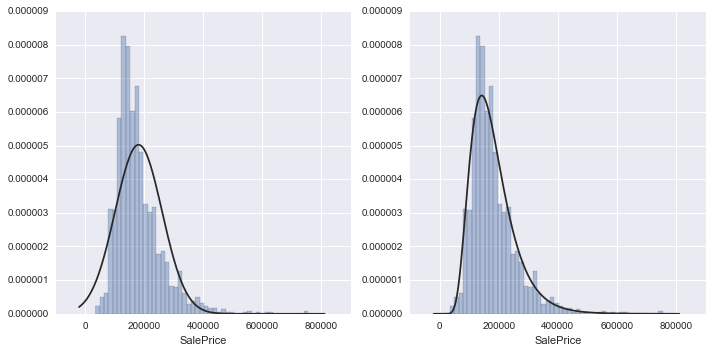

In [3]:
y = train.SalePrice
plot.figure(figsize=(10,5))
plot.subplot(121);sns.distplot(y, kde=False, fit=st.norm)
plot.subplot(122);sns.distplot(y, kde=False, fit=st.lognorm)
plot.tight_layout()
y = np.log1p(y)

train.drop('SalePrice',1,inplace=True)
all_data = pd.concat([train,test]) 

## Exploratory Analysis

The House Prices is a heterogeneous dataset including numeric and categorical attributes with lots of missing values. Excluding the last column of train dataset (which is labels), train and test datasets have 80 columns each. The first column is record number (‘Id’). 

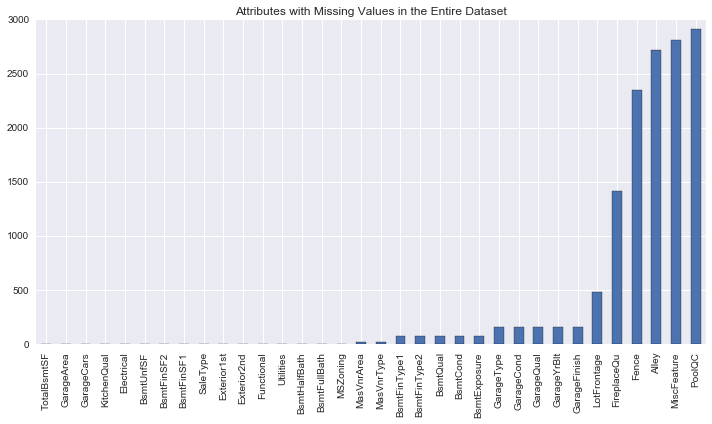

In [4]:
#count number of missing values in each type of attribute
def missing_count(df):
    msv = df.isnull().sum()
    msv = msv[msv > 0]
    msv.sort_values(inplace=True)
    return msv

missing = missing_count(all_data)

#plot attributes with missing values in the entire datset
plot.figure(figsize=(10,6))
missing.plot.bar()
plot.title('Attributes with Missing Values in the Entire Dataset')
plot.tight_layout()

As can be seen, attributes with missing values mostly belong to categorical variables. I decided to remove the attributes with more than 500 missing values. I have also removed non-intuitive attributes and attributes with many categories.

In [5]:
-

Number of Numeric Attributes = 33
Number of Categorical Attributes = 37


# Data Preprocessing

Linear regression models ideally assume that the input variables approximately have normal distribution. You may need to transform some of your input variables to better meet these assumptions. So we check the distribution form of numeric features and we.

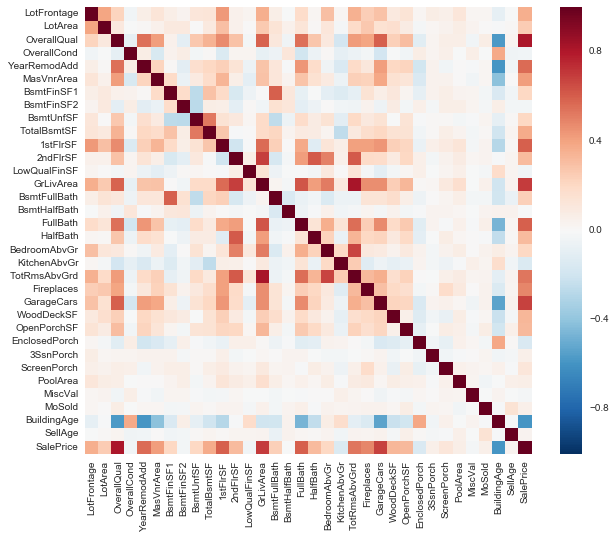

In [6]:
-

In [7]:
##preprocessing of categorical features
feature = all_data[categorical]
#identify the most frequent level of each categorical feature
frequentLevel = feature.apply(lambda x: x.value_counts().idxmax())
def itemReplace (column,value):
    frequentLevel[column] = value
itemReplace('BsmtFinSF1','None')
itemReplace('BsmtFinSF2','None')
itemReplace('GarageType','None')
itemReplace('GarageFinish','None')
itemReplace('GarageQual','None')
itemReplace('GarageCond','None')
all_data[categorical] = feature.fillna(frequentLevel)

#all_data = all_data.fillna(0)
# all_data = all_data.fillna(all_data.mean())

#transform categorical variables into dummy variables
all_data = pd.get_dummies(all_data)
all_data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.049422,-0.133270,0.651479,-0.460408,0.877541,1.201405,0.779431,-0.355342,-0.340511,...,0,0,0,1,0,0,0,0,1,0
1,2,0.602961,0.113413,-0.071836,1.948163,-0.424186,-0.812669,0.888257,-0.355342,0.002218,...,0,0,0,1,0,0,0,0,1,0
2,3,0.092181,0.420049,0.651479,-0.460408,0.829642,1.129181,0.654803,-0.355342,0.230372,...,0,0,0,1,0,0,0,0,1,0
3,4,-0.300383,0.103317,0.651479,-0.460408,-0.715872,-0.812669,0.384539,-0.355342,0.348034,...,0,0,0,1,1,0,0,0,0,0
4,5,0.756511,0.878431,1.374795,-0.460408,0.733773,1.421592,0.754400,-0.355342,0.295711,...,0,0,0,1,0,0,0,0,1,0


In [8]:
#now we have the feature set
x_train = all_data[:train.shape[0]]
x_test = all_data[train.shape[0]:]
columns=x_train.columns
print x_train.shape
print x_test.shape

##using PCA for dimensionality reduction
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# x_train = pca.fit_transform(x_train)
# x_test = pca.fit_transform(x_test)

(1460, 264)
(1459, 264)


outlier detection

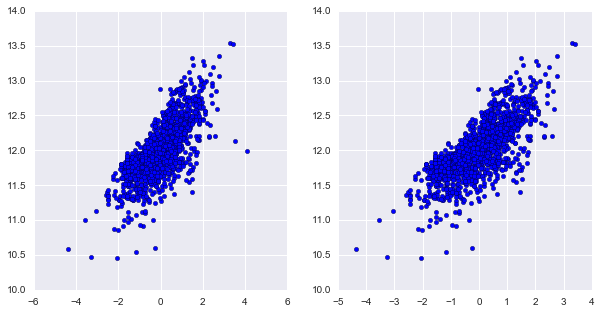

In [9]:
plot.figure(figsize=(10,5))
plot.subplot(121);
var = 'GrLivArea'
data_before = pd.concat([x_train[var],y], axis=1)
matplotlib.pyplot.scatter(data_before[var],data_before['SalePrice'])

#deleting points
x_train.sort_values(by = var, ascending = False)[:2]
x_train = x_train.drop(x_train.index[[1298,523]])
y = y.drop(y.index[[1298,523]])

plot.subplot(122); 
data_after = pd.concat([x_train[var],y], axis=1)
matplotlib.pyplot.scatter(data_after[var],data_after['SalePrice']);



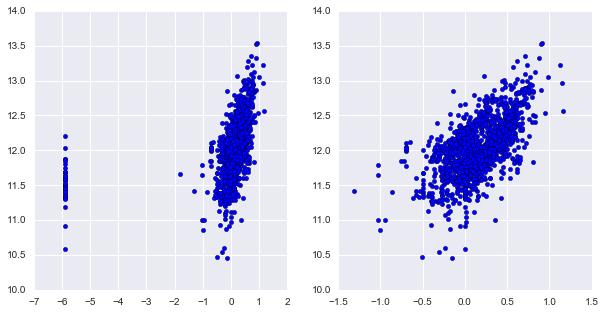

In [10]:
var = 'TotalBsmtSF'
plot.figure(figsize=(10,5))
plot.subplot(121);
data_before = pd.concat([x_train[var],y], axis=1)
matplotlib.pyplot.scatter(data_before[var],data_before['SalePrice'])

def correct(dataset,var):
    idx = columns.get_loc(var)
    n = dataset.shape[0]
    for i in range(n):
        if  dataset.iloc[i,idx] < -4:
            dataset.iloc[i,idx]=0
    return dataset
            
x_train = correct(x_train,var)
x_test = correct(x_test,var)

#deleting points
x_train.sort_values(by = var, ascending = True)[:1]
x_train = x_train.drop(x_train.index[[871]])
y = y.drop(y.index[[871]])
plot.subplot(122); 
data_after = pd.concat([x_train[var],y], axis=1)
matplotlib.pyplot.scatter(data_after[var],data_after['SalePrice']);

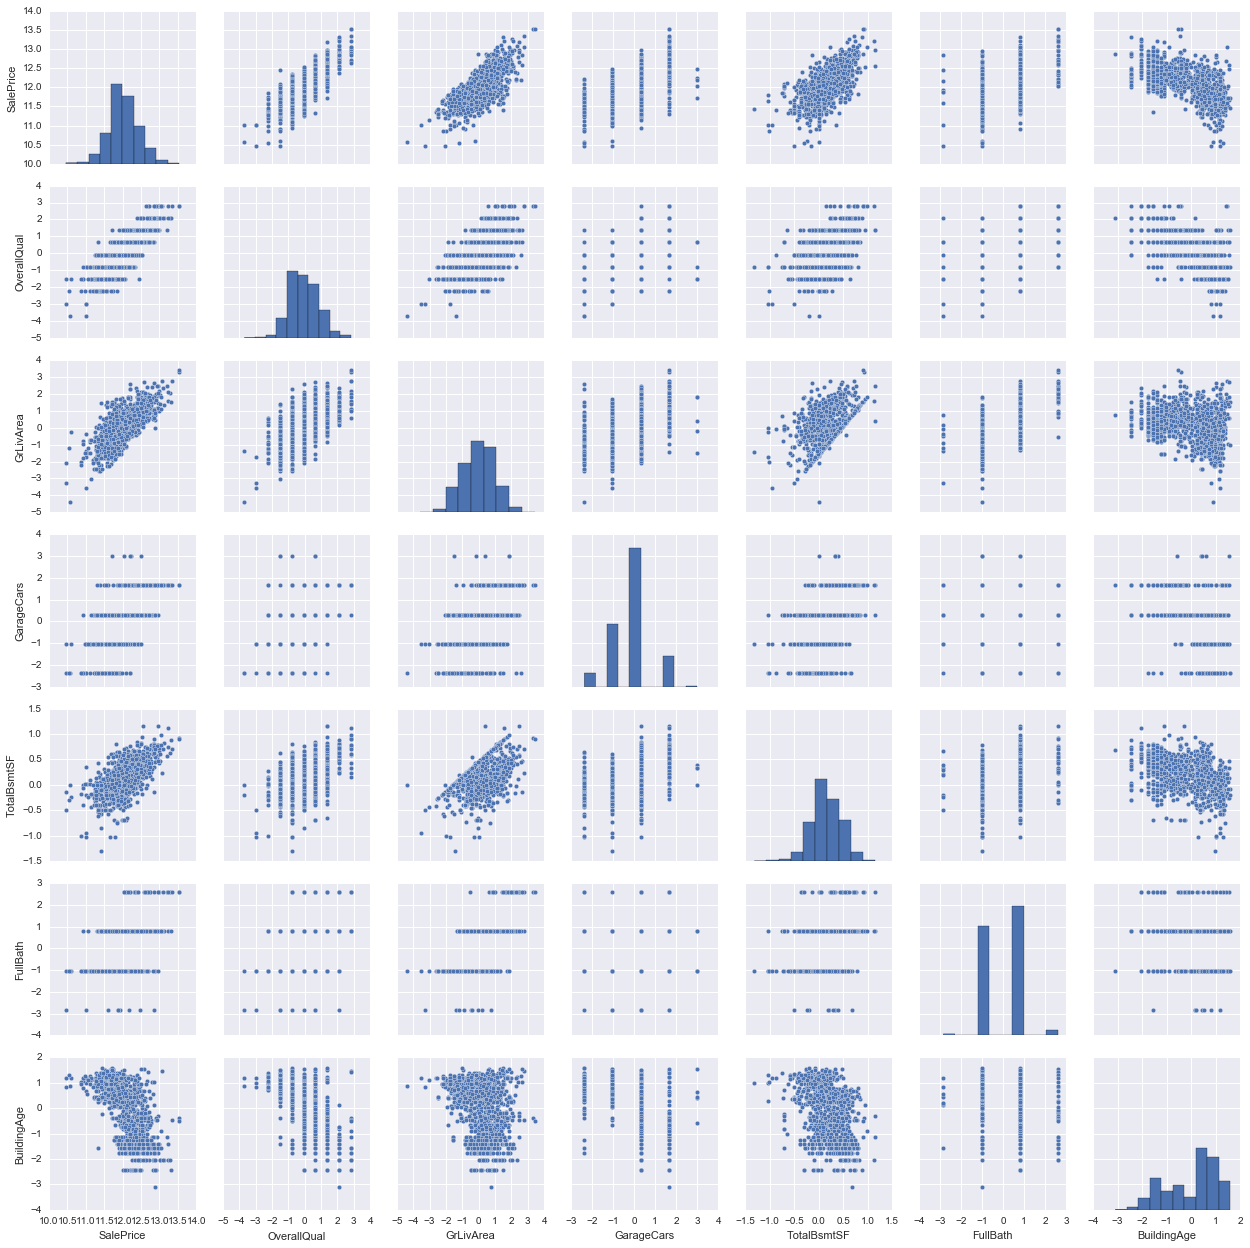

In [11]:
data = pd.concat([x_train,y], axis=1)
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'BuildingAge']
sns.pairplot(data[cols], size = 2.5);

In [12]:
pickle_file = os.path.join(data_root, 'house_price_clean.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': x_train,
    'train_labels': y,
    'test_dataset': x_test,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise